In [1]:
#import libraries needed
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew, probplot
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#read in file
flights_df = pd.read_csv('Freshly_cleaned.csv')

In [3]:
#check number of rows and columns
flights_df.shape

(300257, 25)

In [4]:
#count the number of categorical variables
cat_count = 0
for dtype in flights_df.dtypes:
    if dtype == 'object':
        cat_count = cat_count + 1

In [5]:
print('# of categorical variables:',cat_count)
print('# of continuous variables:',flights_df.shape[1] - cat_count - 1) #subtract and extra column as 1 column is an ID column

# of categorical variables: 12
# of continuous variables: 12


In [6]:
flights_df.head()

,Unnamed: 0,airline,from,to,price,class_category,class,day,month,flight_no,route,dep_hour,arr_hour,dep_period,arr_period,airline_index,route_index,duration_in_min,stops,stops_category,arr_daytime,arr_daytime_category,dep_daytime,dep_daytime_category,month_category
0,0,SpiceJet,Delhi,Mumbai,5953,Economy,0,11,2,SG-8709,Delhi-Mumbai,18,21,Afternoon,Night,4,14,130,0,Non-stop,0,Night Arrival,1,Daytime Departure,February
1,1,SpiceJet,Delhi,Mumbai,5953,Economy,0,11,2,SG-8157,Delhi-Mumbai,6,8,Early_morning,Morning,4,14,140,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February
2,2,AirAsia,Delhi,Mumbai,5956,Economy,0,11,2,I5-764,Delhi-Mumbai,4,6,Early_morning,Early_morning,1,14,130,0,Non-stop,1,Daytime Arrival,0,Night Departure,February
3,3,Vistara,Delhi,Mumbai,5955,Economy,0,11,2,UK-995,Delhi-Mumbai,10,12,Morning,Morning,7,14,135,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February
4,4,Vistara,Delhi,Mumbai,5955,Economy,0,11,2,UK-963,Delhi-Mumbai,8,11,Morning,Morning,7,14,140,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February


In [7]:
#check the column names
flights_df.columns

Index(['Unnamed: 0', 'airline', 'from', 'to', 'price', 'class_category',
       'class', 'day', 'month', 'flight_no', 'route', 'dep_hour', 'arr_hour',
       'dep_period', 'arr_period', 'airline_index', 'route_index',
       'duration_in_min', 'stops', 'stops_category', 'arr_daytime',
       'arr_daytime_category', 'dep_daytime', 'dep_daytime_category',
       'month_category'],
      dtype='object')

In [8]:
#missing data
total = flights_df.isnull().sum().sort_values(ascending=False)
percent = (flights_df.isnull().sum()/flights_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Unnamed: 0,0,0.0
dep_period,0,0.0
dep_daytime_category,0,0.0
dep_daytime,0,0.0
arr_daytime_category,0,0.0
arr_daytime,0,0.0
stops_category,0,0.0
stops,0,0.0
duration_in_min,0,0.0
route_index,0,0.0


In [9]:
#Check remaining missing values if any 
all_data_na = (flights_df.isnull().sum() / len(flights_df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


### Handling Outliers

#### Target Variable

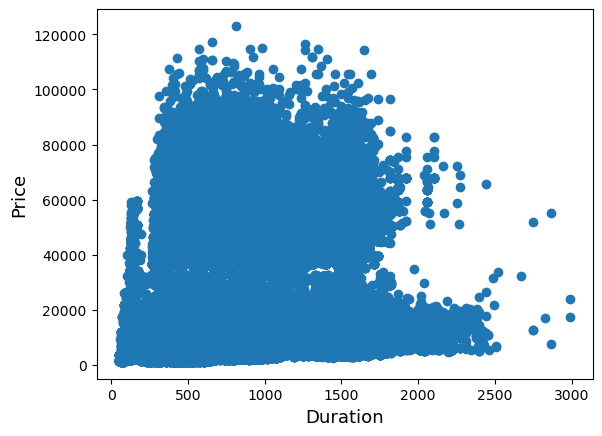

In [10]:
fig, ax = plt.subplots()
ax.scatter(x = flights_df['duration_in_min'], y = flights_df['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Duration', fontsize=13)
plt.show()

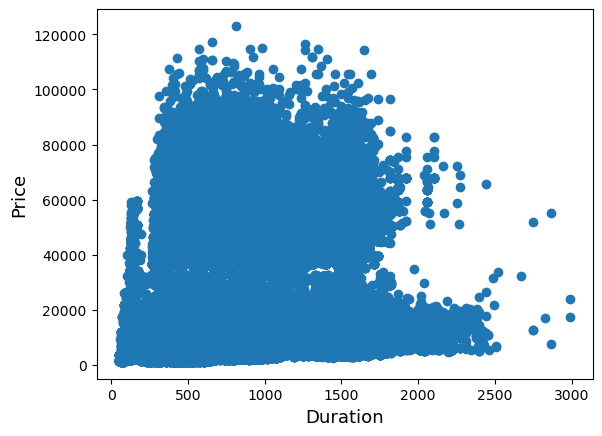

In [11]:
#Deleting outliers
flights_df = flights_df.drop(flights_df[(flights_df['price']>120000) & (flights_df['duration_in_min']>2500)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(flights_df['duration_in_min'], flights_df['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Duration', fontsize=13)
plt.show()

### Normalize Target Variable


 mu = 20883.93 and sigma = 22695.95



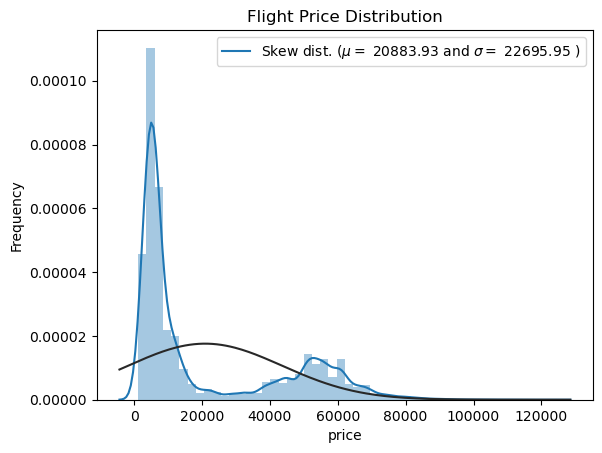

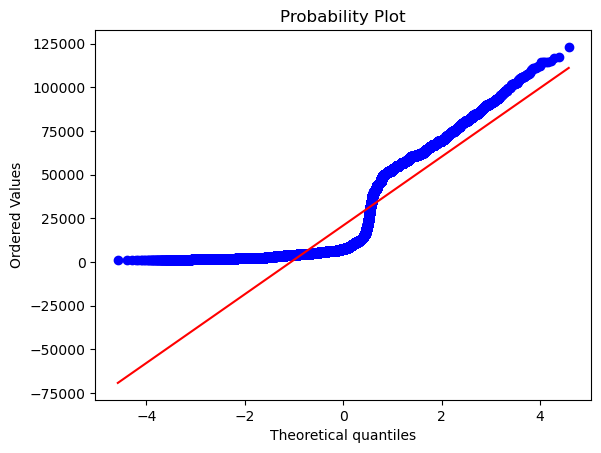

In [12]:
sns.distplot(flights_df['price'], fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(flights_df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Skew dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Flight Price Distribution')

#Get also the QQ-plot
fig = plt.figure()
res = probplot(flights_df['price'], plot=plt)
plt.show()


 mu = 9.33 and sigma = 1.11



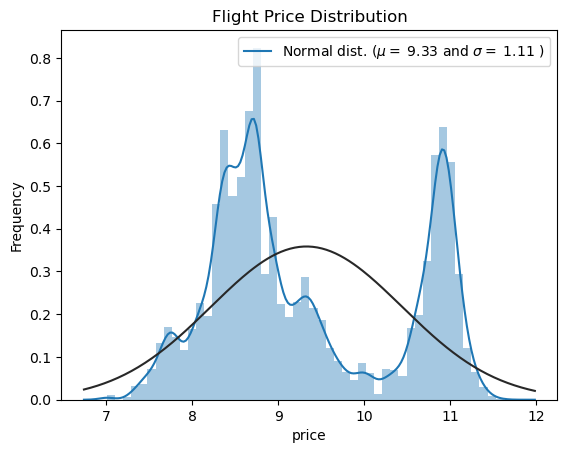

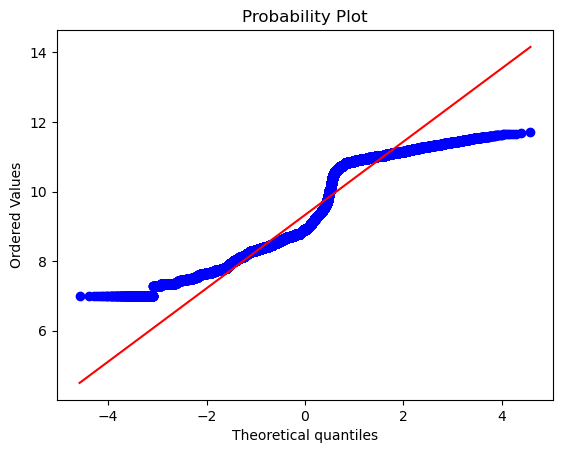

In [13]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
flights_df["price"] = np.log1p(flights_df["price"])

#Check the new distribution 
sns.distplot(flights_df['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(flights_df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Flight Price Distribution')

#Get also the QQ-plot
fig = plt.figure()
res = probplot(flights_df['price'], plot=plt)
plt.show()

### Data Analysis and Visualization

In [14]:
from sklearn.preprocessing import LabelEncoder

Target Variable Scatterplots

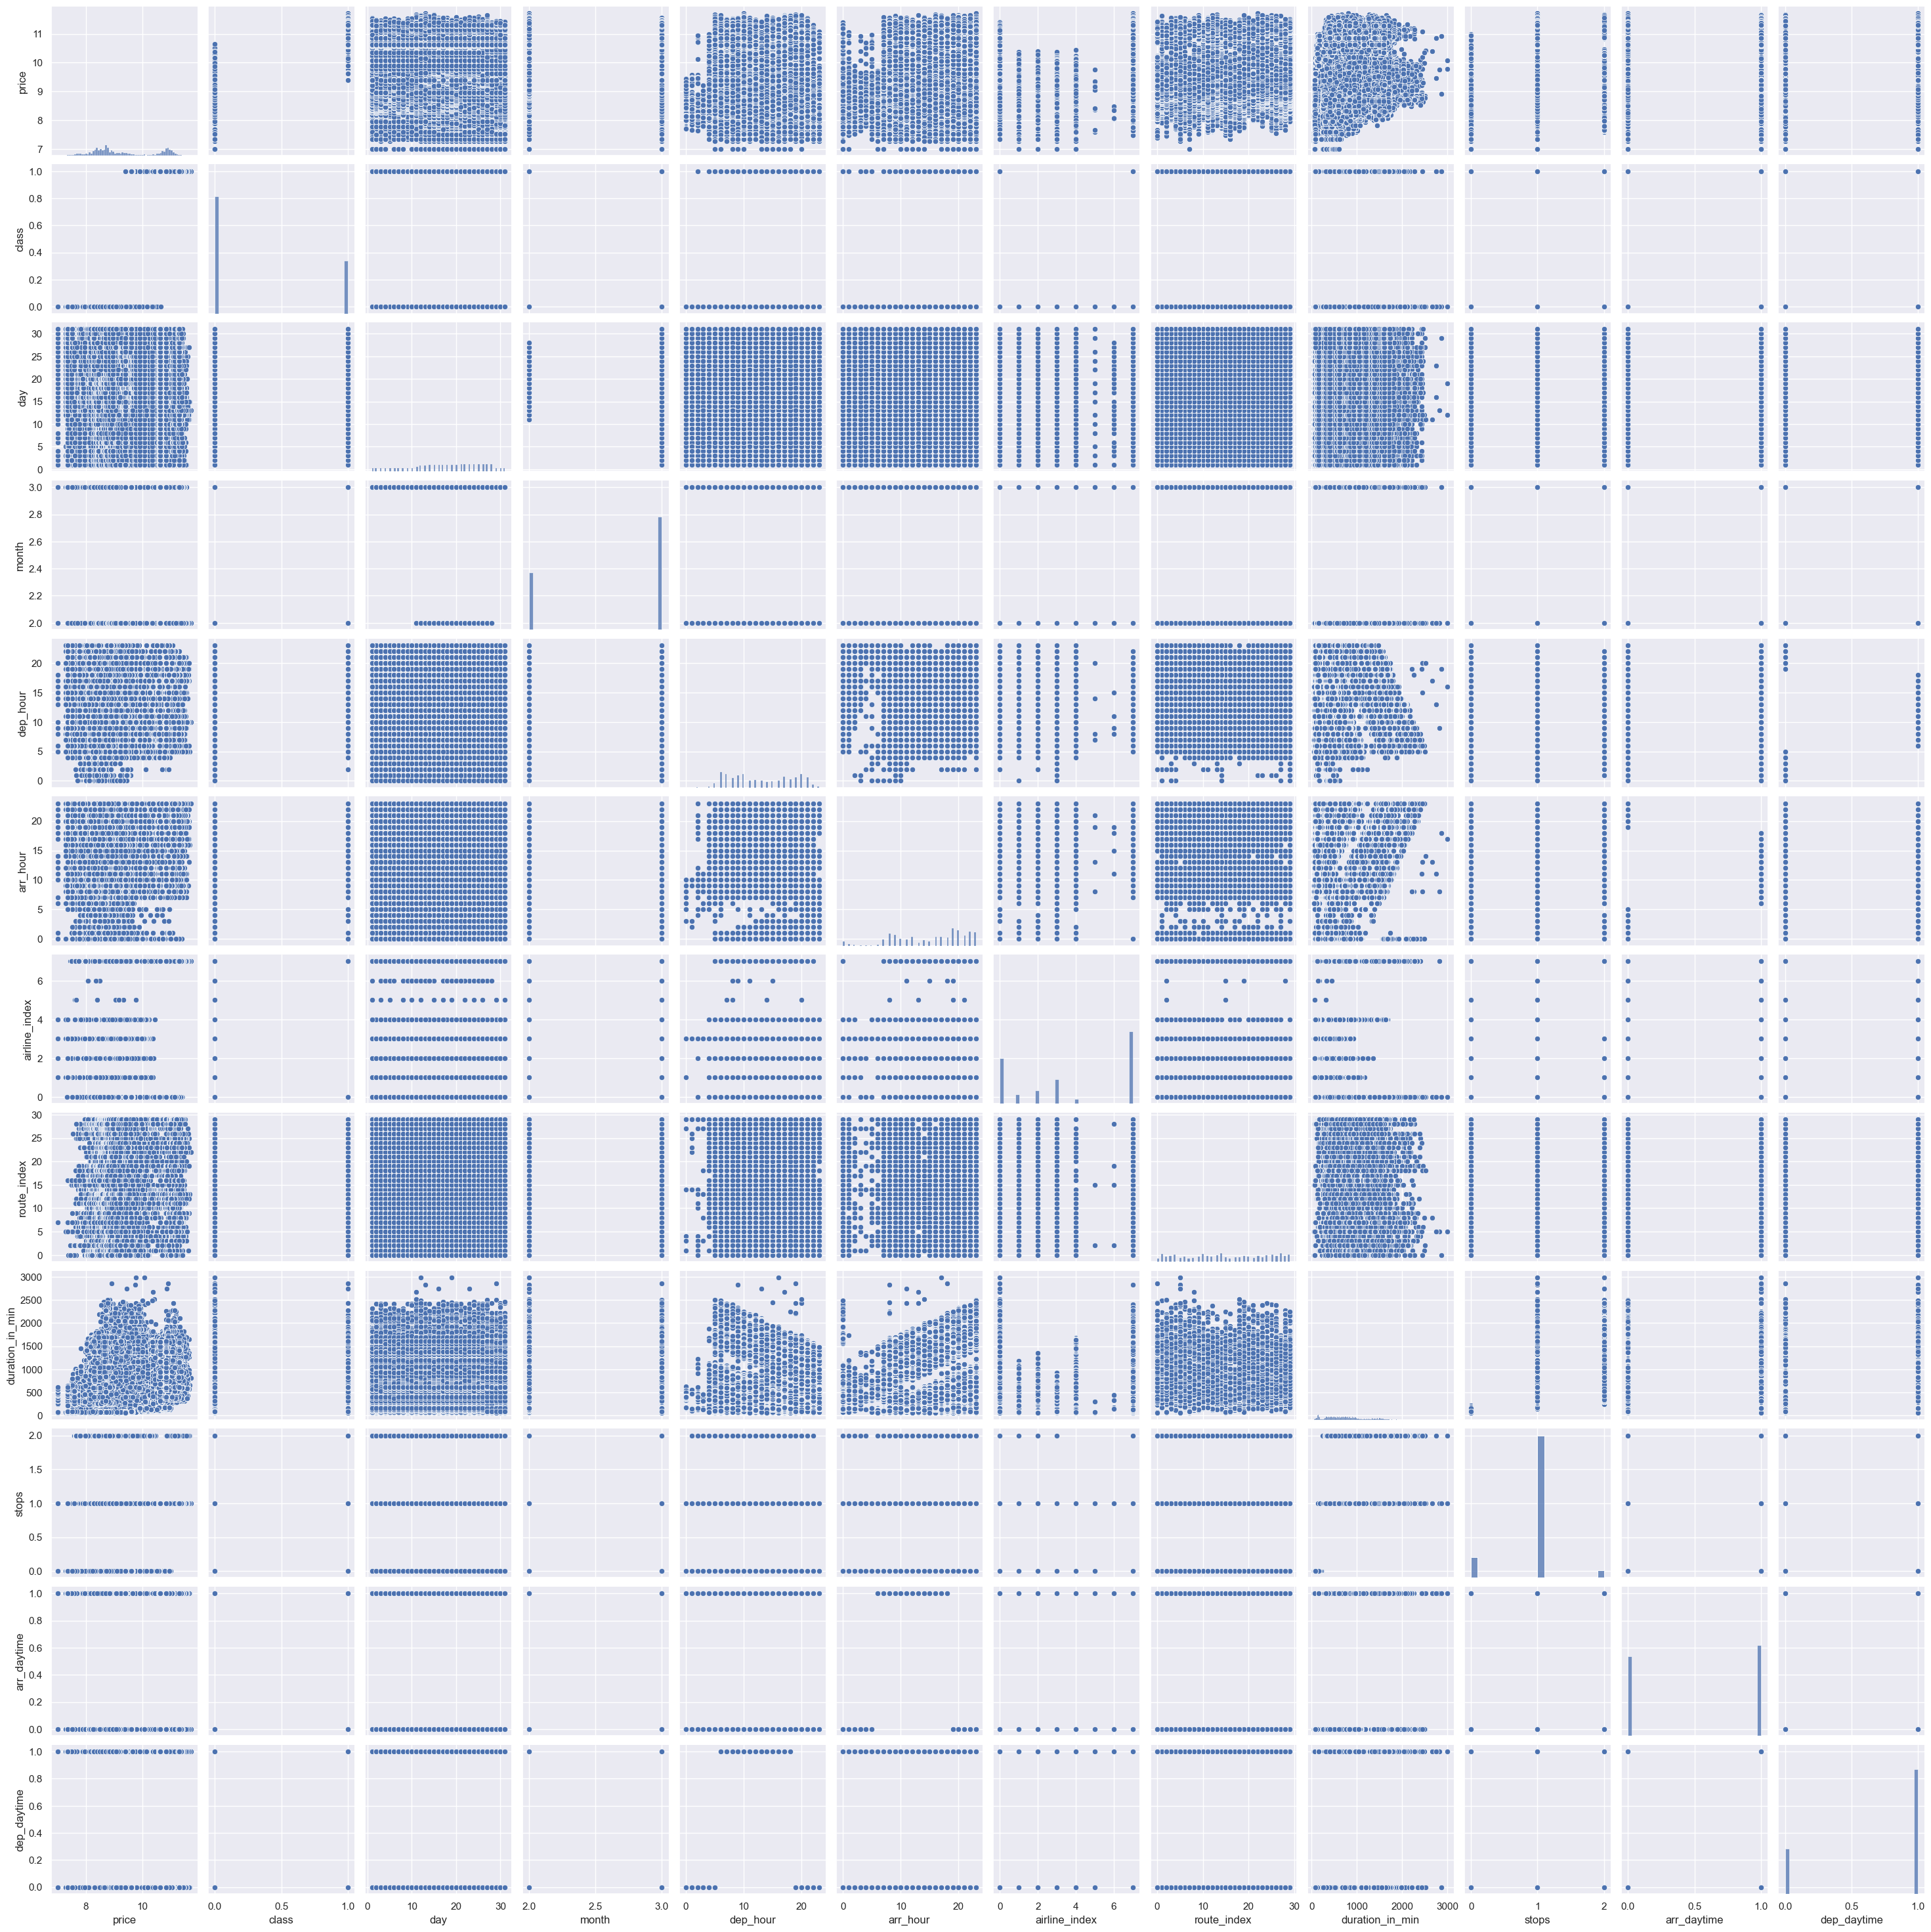

In [15]:
#scatterplot
sns.set()
cols = ['airline', 'from', 'to', 'price', 'class_category',
       'class', 'day', 'month', 'flight_no', 'route', 'dep_hour', 'arr_hour',
       'dep_period', 'arr_period', 'airline_index', 'route_index',
       'duration_in_min', 'stops', 'stops_category', 'arr_daytime',
       'arr_daytime_category', 'dep_daytime', 'dep_daytime_category',
       'month_category']
sns.pairplot(flights_df[cols], size = 2.5)
plt.show();

Correlation Matrix

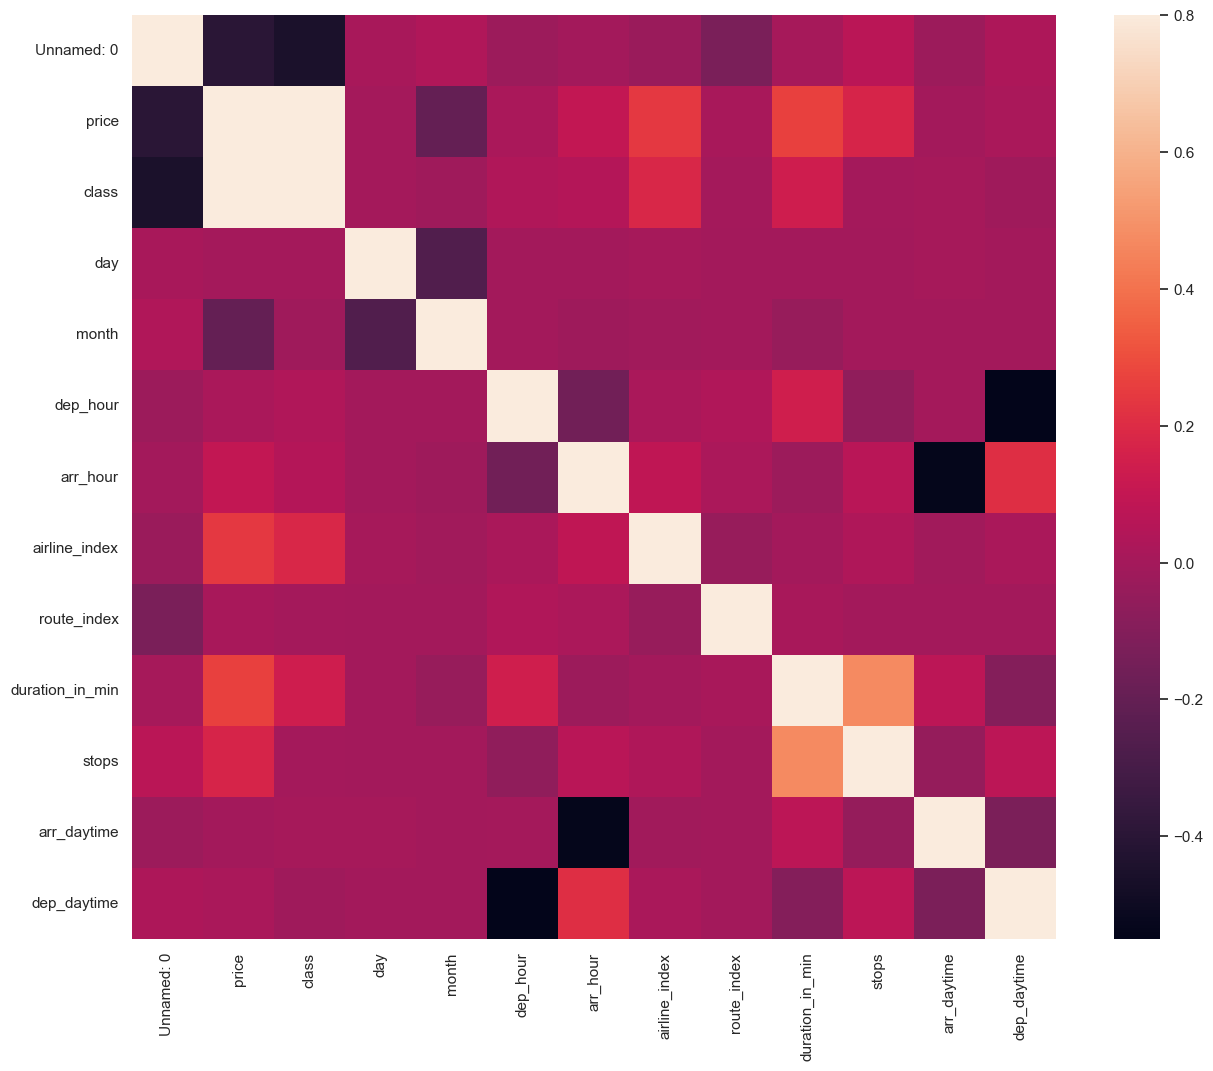

In [16]:
# Correlation map to see how flight characteristics are correlated with price
corrmat = flights_df.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

In [17]:
# TODO make more categorical variables
flights_df['month'] = flights_df['month'].apply(str)



### Label encode categorical variables

In [18]:
cols = ('class', 'day', 'month', 'dep_hour', 'arr_hour', 'airline_index', 
        'duration_in_min', 'stops', 'arr_daytime', 'dep_daytime')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(flights_df[c].values)) 
    flights_df[c] = lbl.transform(list(flights_df[c].values))

# shape        
print('Shape housing_df: {}'.format(flights_df.shape))

Shape housing_df: (300257, 25)


In [19]:
numeric_feats = flights_df.dtypes[flights_df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = flights_df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
class,0.814789
duration_in_min,0.580330
Unnamed: 0,0.453130
price,0.404798
dep_hour,0.106441
route_index,-0.031934
airline_index,-0.034986
arr_daytime,-0.134823
day,-0.303302
arr_hour,-0.618338


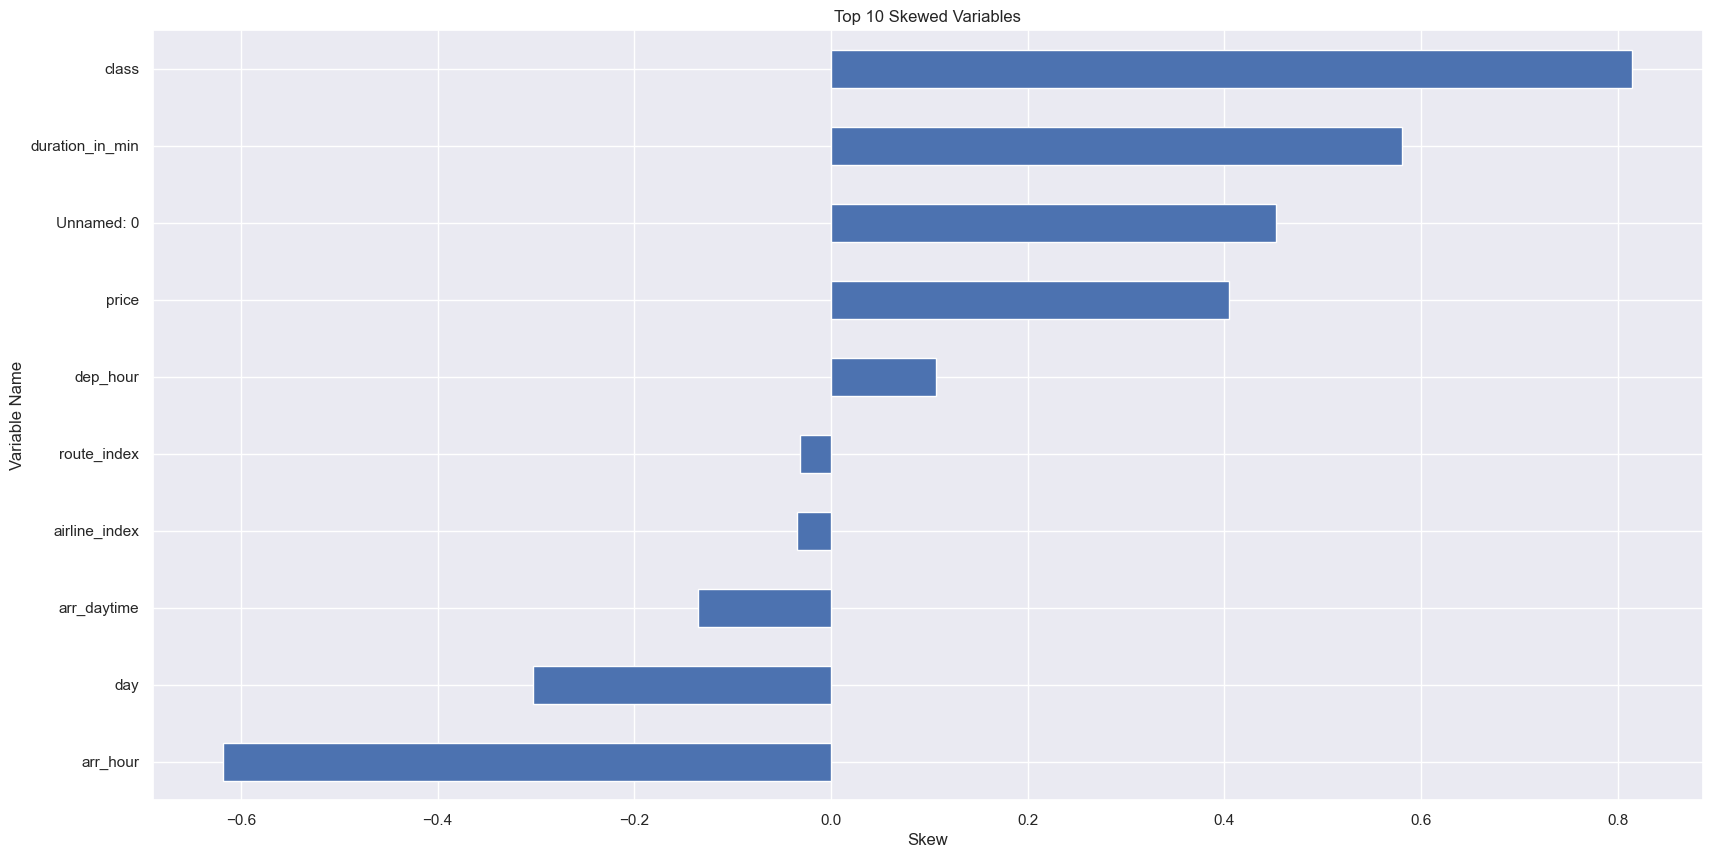

In [20]:
skewness['Skew'].head(10).plot(kind='barh', figsize = (20,10)).invert_yaxis() #top 10 missing columns
plt.xlabel("Skew")
plt.ylabel("Variable Name")
plt.title("Top 10 Skewed Variables")
plt.show()

In [21]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform (normalize)".format(skewness.shape[0]))

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    flights_df[feat] = boxcox1p(flights_df[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 13 skewed numerical features to Box Cox transform (normalize)


In [22]:
flights_df.head()

,Unnamed: 0,airline,from,to,price,class_category,class,day,month,flight_no,route,dep_hour,arr_hour,dep_period,arr_period,airline_index,route_index,duration_in_min,stops,stops_category,arr_daytime,arr_daytime_category,dep_daytime,dep_daytime_category,month_category
0,0.000000,SpiceJet,Delhi,Mumbai,2.706137,Economy,0.0,2.885846,0.0,SG-8709,Delhi-Mumbai,3.701973,3.932510,Afternoon,Night,1.820334,3.34076,3.530419,0.0,Non-stop,0.000000,Night Arrival,0.730463,Daytime Departure,February
1,0.730463,SpiceJet,Delhi,Mumbai,2.706137,Economy,0.0,2.885846,0.0,SG-8157,Delhi-Mumbai,2.259674,2.602594,Early_morning,Morning,1.820334,3.34076,3.701973,0.0,Non-stop,0.730463,Daytime Arrival,0.730463,Daytime Departure,February
2,1.194318,AirAsia,Delhi,Mumbai,2.706210,Economy,0.0,2.885846,0.0,I5-764,Delhi-Mumbai,1.820334,2.259674,Early_morning,Early_morning,0.730463,3.34076,3.530419,0.0,Non-stop,0.730463,Daytime Arrival,0.000000,Night Departure,February
3,1.540963,Vistara,Delhi,Mumbai,2.706186,Economy,0.0,2.885846,0.0,UK-995,Delhi-Mumbai,2.885846,3.128239,Morning,Morning,2.440268,3.34076,3.618223,0.0,Non-stop,0.730463,Daytime Arrival,0.730463,Daytime Departure,February
4,1.820334,Vistara,Delhi,Mumbai,2.706186,Economy,0.0,2.885846,0.0,UK-963,Delhi-Mumbai,2.602594,3.011340,Morning,Morning,2.440268,3.34076,3.701973,0.0,Non-stop,0.730463,Daytime Arrival,0.730463,Daytime Departure,February


In [23]:
housing_df = pd.get_dummies(flights_df)
housing_df.head()

,Unnamed: 0,price,class,day,month,dep_hour,arr_hour,airline_index,route_index,duration_in_min,stops,arr_daytime,dep_daytime,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,from_Bangalore,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,class_category_Business,class_category_Economy,flight_no_2T-515,flight_no_2T-518,flight_no_2T-621,flight_no_2T-623,flight_no_6E-102,flight_no_6E-105,flight_no_6E-113,flight_no_6E-121,flight_no_6E-123,flight_no_6E-126,flight_no_6E-128,flight_no_6E-131,flight_no_6E-132,flight_no_6E-134,flight_no_6E-135,flight_no_6E-136,flight_no_6E-138,flight_no_6E-139,flight_no_6E-146,flight_no_6E-148,flight_no_6E-149,flight_no_6E-151,flight_no_6E-152,flight_no_6E-153,flight_no_6E-154,flight_no_6E-156,flight_no_6E-157,flight_no_6E-161,flight_no_6E-164,flight_no_6E-165,flight_no_6E-168,flight_no_6E-171,flight_no_6E-172,flight_no_6E-176,flight_no_6E-177,flight_no_6E-179,flight_no_6E-181,flight_no_6E-183,flight_no_6E-184,flight_no_6E-186,flight_no_6E-188,flight_no_6E-192,flight_no_6E-193,flight_no_6E-198,flight_no_6E-199,flight_no_6E-2001,flight_no_6E-2005,flight_no_6E-2007,flight_no_6E-2008,flight_no_6E-2009,flight_no_6E-201,flight_no_6E-2013,flight_no_6E-2015,flight_no_6E-2016,flight_no_6E-2022,flight_no_6E-2025,flight_no_6E-2026,flight_no_6E-2027,flight_no_6E-2028,flight_no_6E-2031,flight_no_6E-2032,flight_no_6E-2033,flight_no_6E-2034,flight_no_6E-2036,flight_no_6E-2042,flight_no_6E-2043,flight_no_6E-2046,flight_no_6E-2047,flight_no_6E-2048,flight_no_6E-205,flight_no_6E-2053,flight_no_6E-2054,flight_no_6E-2057,flight_no_6E-2061,flight_no_6E-2062,flight_no_6E-2065,flight_no_6E-2069,flight_no_6E-207,flight_no_6E-2076,flight_no_6E-2077,flight_no_6E-208,flight_no_6E-2081,flight_no_6E-2082,flight_no_6E-2083,flight_no_6E-2087,flight_no_6E-2089,flight_no_6E-2092,flight_no_6E-2093,flight_no_6E-2097,flight_no_6E-2102,flight_no_6E-2103,flight_no_6E-2106,flight_no_6E-2107,flight_no_6E-2109,flight_no_6E-212,flight_no_6E-2127,flight_no_6E-213,flight_no_6E-2131,flight_no_6E-2137,flight_no_6E-2147,flight_no_6E-2148,flight_no_6E-2154,flight_no_6E-2162,flight_no_6E-2168,flight_no_6E-2169,flight_no_6E-2172,flight_no_6E-2174,flight_no_6E-2176,flight_no_6E-2178,flight_no_6E-218,flight_no_6E-2181,flight_no_6E-2186,flight_no_6E-2188,flight_no_6E-219,flight_no_6E-2193,flight_no_6E-221,flight_no_6E-224,flight_no_6E-2247,flight_no_6E-2248,flight_no_6E-2249,flight_no_6E-227,flight_no_6E-2274,flight_no_6E-232,flight_no_6E-2329,flight_no_6E-2331,flight_no_6E-2336,flight_no_6E-2337,flight_no_6E-2338,flight_no_6E-234,flight_no_6E-2343,flight_no_6E-2346,flight_no_6E-2348,flight_no_6E-2349,flight_no_6E-236,flight_no_6E-2367,flight_no_6E-2373,flight_no_6E-244,flight_no_6E-245,flight_no_6E-2456,flight_no_6E-246,flight_no_6E-2471,flight_no_6E-2474,flight_no_6E-2478,flight_no_6E-2479,flight_no_6E-248,flight_no_6E-2485,flight_no_6E-251,flight_no_6E-2511,flight_no_6E-2513,flight_no_6E-2514,flight_no_6E-2516,flight_no_6E-2517,flight_no_6E-2518,flight_no_6E-2519,flight_no_6E-255,flight_no_6E-261,flight_no_6E-2615,flight_no_6E-2616,flight_no_6E-2618,flight_no_6E-266,flight_no_6E-268,flight_no_6E-2685,flight_no_6E-269,flight_no_6E-271,flight_no_6E-2719,flight_no_6E-274,flight_no_6E-2752,flight_no_6E-2753,flight_no_6E-276,flight_no_6E-2763,flight_no_6E-2769,flight_no_6E-282,flight_no_6E-283,flight_no_6E-2841,flight_no_6E-2843,flight_no_6E-285,flight_no_6E-286,flight_no_6E-289,flight_no_6E-2901,flight_no_6E-2914,flight_no_6E-292,flight_no_6E-2938,flight_no_6E-2939,flight_no_6E-294,flight_no_6E-295,flight_no_6E-296,flight_no_6E-298,flight_no_6E-307,flight_no_6E-308,flight_no_6E-309,flight_no_6E-312,flight_no_6E-318,flight_no_6E-319,flight_no_6E-321,flight_no_6E-3211,flight_no_6E-3214,flight_no_6E-327,flight_no_6E-331,flight_no_6E-332,flight_no_6E-345,flight_no_6E-353,flight_no_6E-354,flight_no_6E

### Data Analytics

In [25]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb

OSError: dlopen(/Users/madeleinewoo/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: <D21A7969-4567-3BC7-94ED-6A9E83AE9D78> /Users/madeleinewoo/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file, not in dyld cache)

In [ ]:
train_df = flights_df[flights_df.columns.difference(['Unnamed: 0', 'price'])]

In [ ]:
#Validation function
n_folds = 5

def rmse_cv(model,n_folds):
    kf=KFold(n_splits=n_folds)
    rmse = np.sqrt(-cross_val_score(model, train_df, flights_df.price, scoring="neg_mean_squared_error", cv = kf))
    return rmse

In [ ]:
lr_w_int = LinearRegression()
lr_no_int = LinearRegression(fit_intercept=False)

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=10)

In [ ]:
rf = RandomForestRegressor(n_estimators=100)

In [ ]:
dt = DecisionTreeRegressor(max_depth = 10)

In [ ]:
model_xgb = xgb.XGBRegressor(max_depth=5, n_estimators=1000, learning_rate=0.01)

In [ ]:
model_lgb = lgb.LGBMRegressor(learning_rate=0.01, max_depth=5, n_estimators=1000)

NameError: name 'lgb' is not defined